In [9]:
import json
import os
import sys
import pandas as pd
import numpy as np
from __future__ import print_function
from collections import OrderedDict

#rdkit modules
#from rdkit import Chem
#from rdkit.Chem import AllChem
#from rdkit.Chem import Descriptors
#from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculator


#scikit modules
from sklearn.svm import SVR

#plot modules and formatting
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", facecolor="white")
params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

#grab our checkName code
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import salty

In [4]:
datadf = pd.DataFrame.from_csv('../salty/data/salts_with_descriptors.csv')
datadf = datadf.reset_index(drop=False)#.sample(frac=1)
atadf = datadf.loc[:, (datadf != 0).any(axis=0)] #remove columns where all values are 0
datadf.dropna(inplace=True) #remove empty columns and rows with NaN 

datadf = datadf.sample(frac=1).reset_index(drop=True)
anilist = datadf['NAME_ANI']
catlist = datadf['NAME_CAT']
datadf = datadf.drop('NAME_CAT',1) #remove non-numeric columns and normalize values
datadf = datadf.drop('NAME_ANI',1)
datadf = datadf.drop("salt_name",1)

data=np.array(datadf)
n = data.shape[0]
d = data.shape[1]
d -= 1
n_train = int(n*0.8)
n_test  = n - n_train
data = np.random.permutation(data)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = data[:n_train,:-1]
Y_train[:] = np.log(data[:n_train,-1])

X_test[:] = data[n_train:,:-1]
Y_test[:] = np.log(data[n_train:,-1])

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2927, 190)
(732, 190)
(2927,)
(732,)


0.99153482263


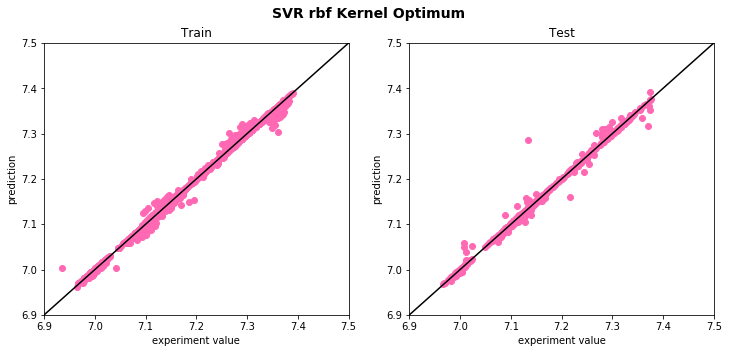

In [32]:
#rbf kernel adjusted to optimum
clf = SVR(C=100.0, epsilon=0.0001, gamma=0.000001, max_iter=1000000)
clf.fit(X_train,Y_train)
print(clf.score(X_test, Y_test))

fig = plt.figure(figsize=(12,5))
fig.suptitle('SVR rbf Kernel Optimum', fontsize=14, fontweight='bold')

plt.subplot(121)
plt.plot(Y_train,clf.predict(X_train),"o",color ='hotpink')
plt.plot(np.arange(6.9,7.5,0.0001),np.arange(6.9,7.5,0.0001),color = 'black')
plt.axis([6.9,7.5,6.9,7.5])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Train')

plt.subplot(122)
plt.plot(Y_test,clf.predict(X_test),"o",color ='hotpink')
plt.plot(np.arange(6.9,7.5,0.0001),np.arange(6.9,7.5,0.0001),color = 'black')
plt.axis([6.9,7.5,6.9,7.5])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Test')
plt.show()

user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(#N)[S-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=

user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned COS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queri

user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with

user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[

user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CS(=O)(=O)O
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=

user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned F[P-](F)(F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(#N)[S-]
user has queried with a name
your query has returned CCN1C=C[N+]

user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(#N)[S-]
user has queried with a name
your query has returned CCN1C=C[N+](=C

user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned COS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=

user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(#N)[S-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CS(=O)(=O)O
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your

user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(#N)[S-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned COS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a

user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CC(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(#N)[S-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query ha

user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned CCOS(=O)(=O)[O-]
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C
user has queried with a name
your query has returned [B-](F)(F)(F)F
user has queried

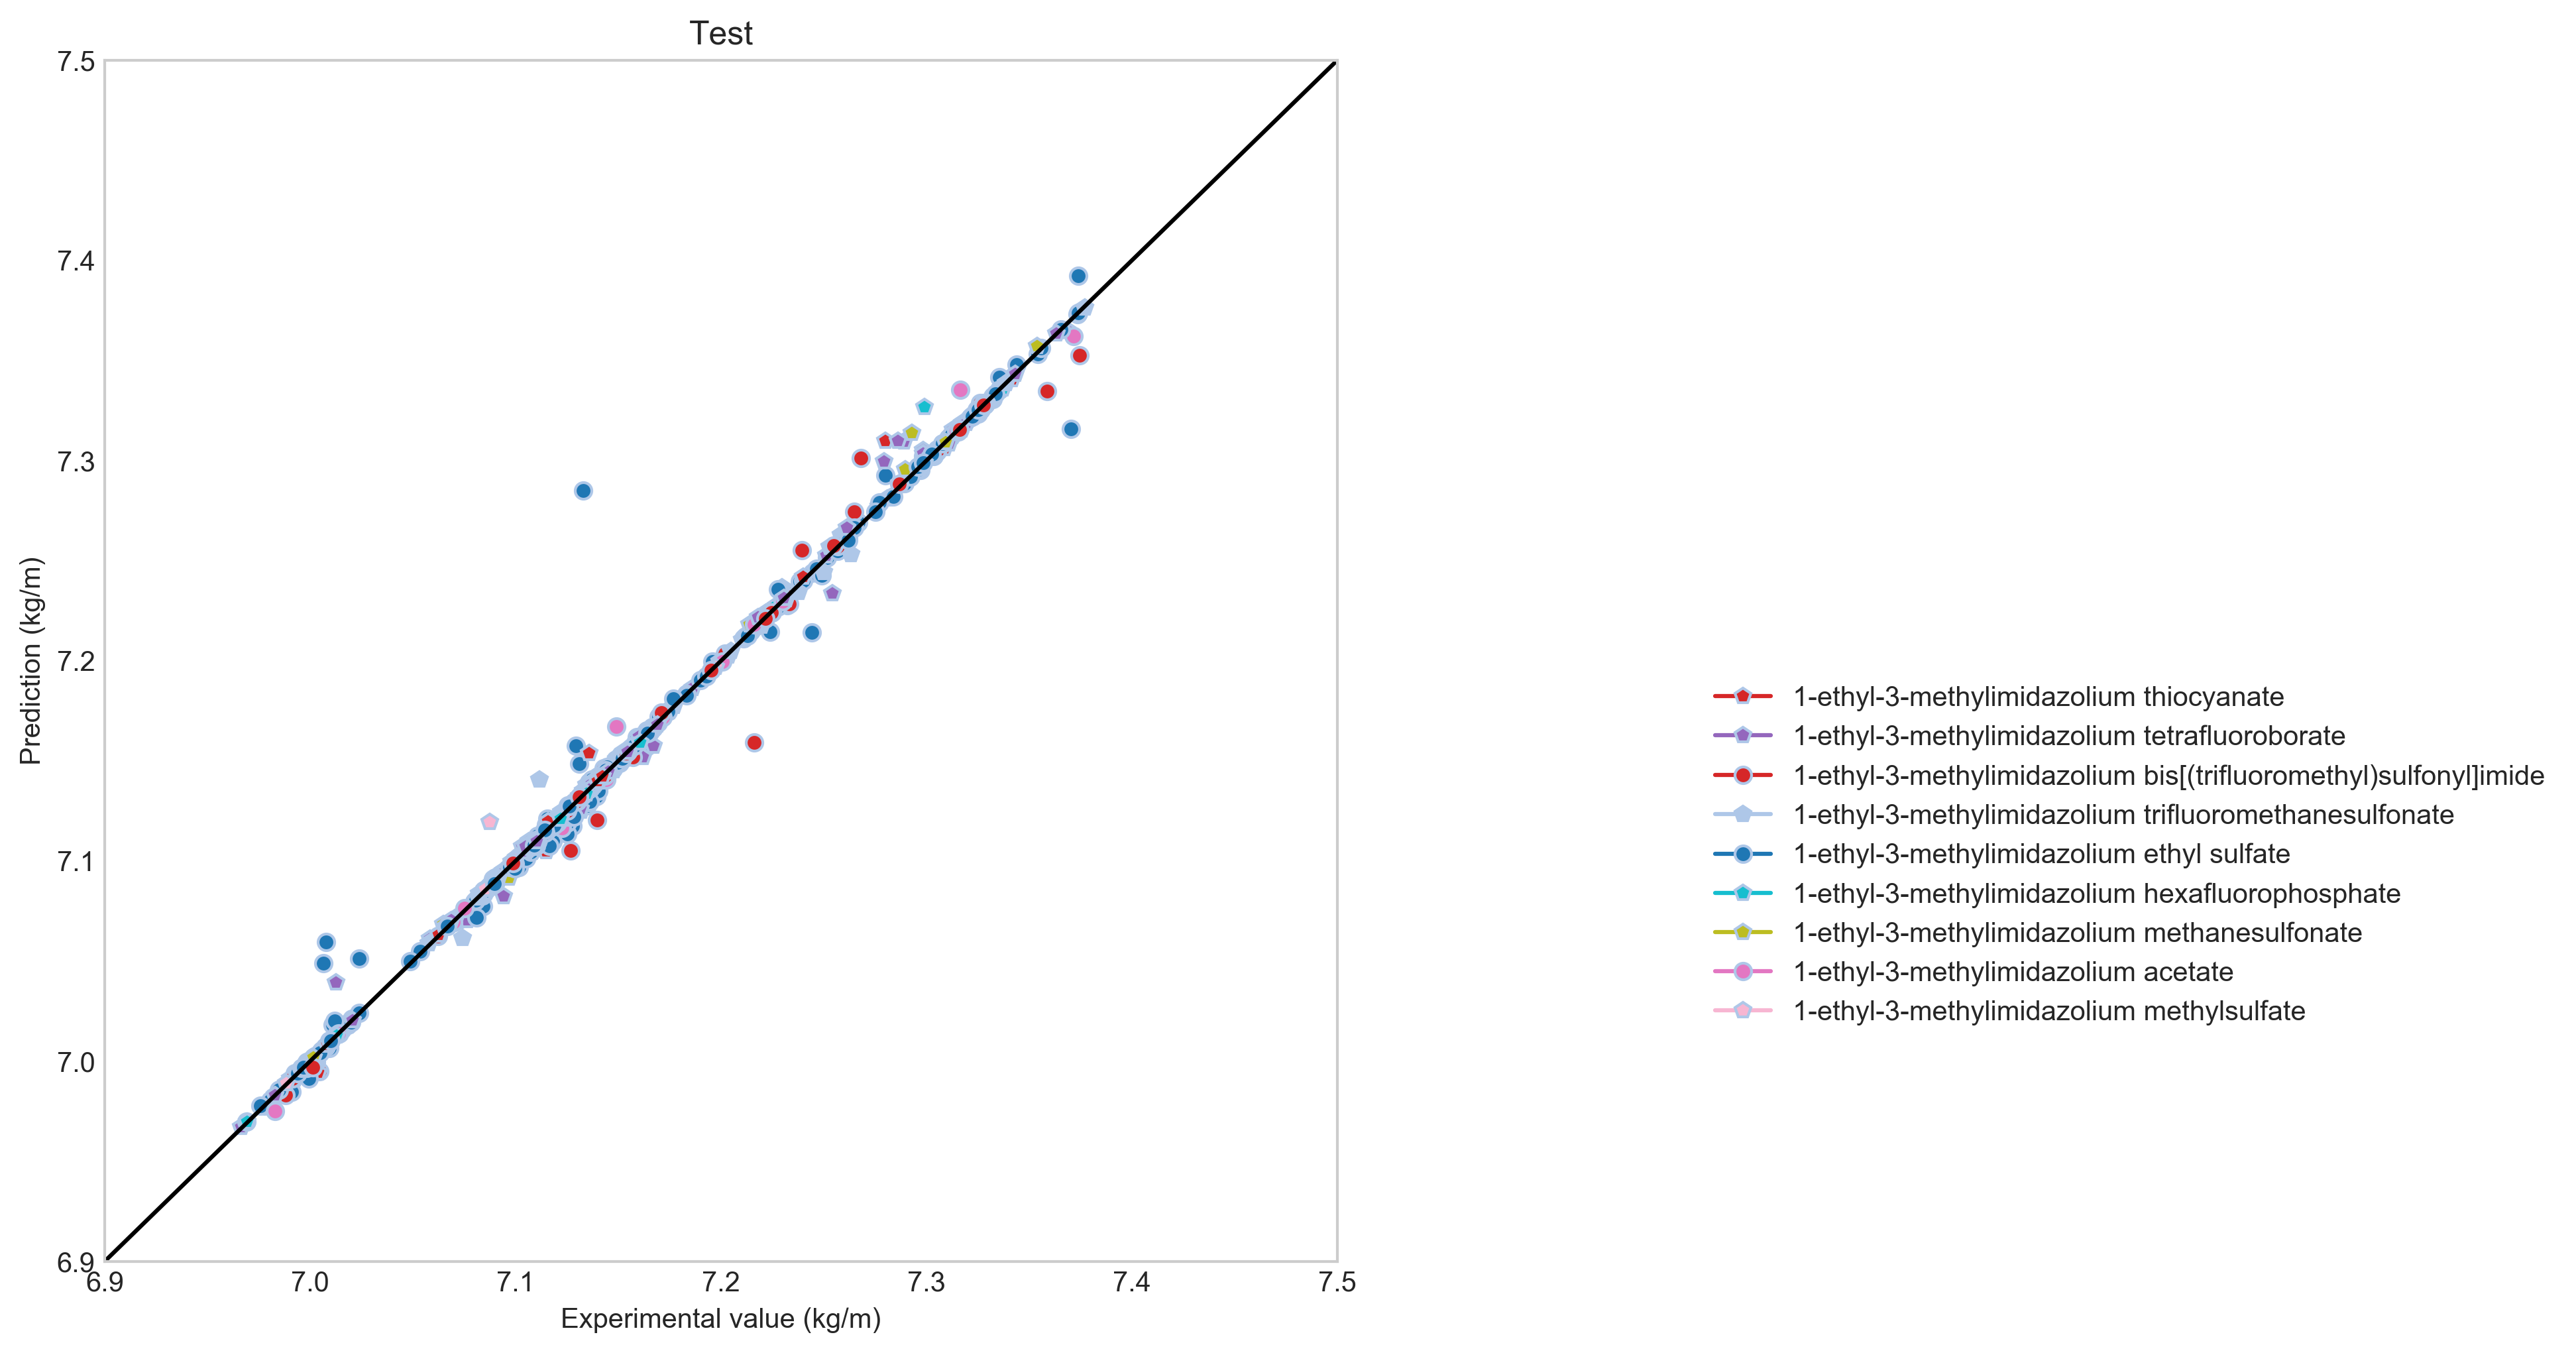

In [33]:
###LOAD VIS WITH TOOLTIPS
import sys
import imp
imp.reload(sys)
#sys.setdefaultencoding("utf-8")
labels=[]
T=[]
P=[]
colors=[]
shapes=[]
edge_colors=[]
check=[]
scatter=[]
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(8,8), dpi=300)
    plt.xlabel('Experimental value (kg/m)')
    plt.ylabel('Prediction (kg/m)')
    plt.title('Train')
    plt.grid(False)
    
    ax2 = fig.add_subplot(111)
    for i in range(len(X_test)):
        catIndex = salty.checkName(catlist[i+n_train],index=True)[1]
        aniIndex = salty.checkName(anilist[i+n_train],index=True)[1]
        name = str("%s %s" % (catlist[i+n_train], anilist[i+n_train]))
        labels.append(name)
        T.append(datadf["Temperature_K"][i+n_train])
        P.append(datadf["Pressure_kPa"][i+n_train])
        
        colors.append(tableau20[aniIndex%20])
        edge_colors.append(tableau20[catIndex%20])
        check.append([catIndex,aniIndex])
        
        if catIndex >= 20 and aniIndex >= 20:
            shapes.append("s")
        elif catIndex < 20 and aniIndex >= 20:
            shapes.append("o")
        elif catIndex >= 20 and aniIndex < 20:
            shapes.append("8")
        elif catIndex < 20 and aniIndex < 20:
            shapes.append("p")
        
    scatter_this = ax2        
    for i in range(len(X_test)):
        ax2.plot(Y_test[i],clf.predict(X_test[i].reshape(1,-1)),marker=shapes[i],color = colors[i],\
                    markeredgecolor = edge_colors[i], mew='1', label=labels[i])

        
    ax2.plot(np.arange(6.75,7.75,0.0001),np.arange(6.75,7.75,0.0001),color = 'black')
    ax2.axis([6.9,7.5,6.9,7.5])
    plt.title('Test')
    plt.grid(False)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(2,0.5))
    plt.show()

In [30]:
clf2 = SVR(C=100.0, epsilon=0.01, gamma=0.000001, max_iter=100000)
clf2.fit(X_train,Y_train)
print(clf2.score(X_test, Y_test))

0.987873090314


In [35]:
["Temperature_K" , "Pressure_kPa", "Density_kg/m"]
X=Y_test
Y=clf.predict(X_test)
Y2=clf2.predict(X_test)
to_save=pd.DataFrame(np.transpose([X,Y,Y2,labels,T,P]),columns=["Density_kg/m, Experimental",\
        "Density_kg/m, Prediction on epsilon=0.0001", "Density_kg/m, Prediction on epsilon=0.01", "Salt Name", "Temperature_K" , "Pressure_kPa"])

In [36]:
to_save

,"Density_kg/m, Experimental","Density_kg/m, Prediction on epsilon=0.0001","Density_kg/m, Prediction on epsilon=0.01",Salt Name,Temperature_K,Pressure_kPa
0,7.152738596900803,7.15462601016758,7.154469026312043,1-ethyl-3-methylimidazolium thiocyanate,318.15,8000.0
1,7.1331363252365385,7.133004871614243,7.142891524894348,1-ethyl-3-methylimidazolium tetrafluoroborate,303.15,101.325
2,7.112938504919354,7.113136479905308,7.1221974108596156,1-ethyl-3-methylimidazolium tetrafluoroborate,313.15,20000.0
3,7.165493475060845,7.165599618080004,7.155926122201469,1-ethyl-3-methylimidazolium bis[(trifluorometh...,333.15,101.325
4,7.017058013872587,7.018336902952197,7.022516870019991,1-ethyl-3-methylimidazolium trifluoromethanesu...,298.15,101.325
5,7.25148681728494,7.251544479539926,7.242486823700886,1-ethyl-3-methylimidazolium ethyl sulfate,320.65,101.325
6,7.373499851307489,7.373177264284438,7.379920220502738,1-ethyl-3-methylimidazolium ethyl sulfate,303.15,101.325
7,7.1278542001101215,7.117435088862827,7.120409382678284,1-ethyl-3-methylimidazolium ethyl sulfate,323.15,35000.0
8,7.147323208710489,7.14621028104509,7.13971021281362,1-ethyl-3-methylimidazolium bis[(trifluorometh...,300.0,101.325
9,7.131778443323355,7.132221507250365,7.133186824802764,1-ethyl-3-methylimidazolium tetrafluoroborate,311.554,19542.0


In [37]:
pd.DataFrame.to_csv(to_save, path_or_buf='../salty/data/SVR_data_2_d3_Press_Temp.csv', index=False)

In [26]:
clf = SVR(C=1, epsilon=0.0001,max_iter=100000)
clf.fit(X_train,Y_train)
print(clf.score(X_test, Y_test))

0.743936517533
